#Objectives

1. To investigate and preprocess online transaction data in order to discover significant indicators of fraudulent ativity.

2. To develop and apply machine learning models that are capable to detet fraudulent transactions with strong classification performance.

3. To compare and evaluate the efficiency of different fraud detection algorithms basedd on performance matrices.

# Data Collection/ Loading

In [ ]:
# --------------------------------------
# Load collected dataset
# --------------------------------------
# Import libraries
import pandas as pd
from google.colab import drive
import os

# Mount Google Drive to the Colab environment
drive.mount('/content/drive')

# Define the path to your dataset folder within Google Drive
data_dir = '/content/drive/My Drive/WQD7001Principles/Dataset'

# Function to check if file exists and prompt for upload if not
def ensure_file_exists(file_path):
  if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
    print("Please upload the file to your Google Drive in the correct directory.")
    from google.colab import files
    uploaded = files.upload()  # This will prompt for file upload
    # After upload, move the file to the desired path
    for file_name in uploaded:
      os.rename(file_name, file_path)
    print(f"Uploaded {file_name} to {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ensure data files exist
ensure_file_exists(os.path.join(data_dir, 'Synthetic_Financial_datasets_log.csv'))

# Load each dataset into a Pandas DataFrame
df = pd.read_csv(os.path.join(data_dir, 'Synthetic_Financial_datasets_log.csv'))

# Data Cleaning/ Scrub

In [ ]:
# printing the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# print the shape of the data
df.shape

(6362620, 11)

In [ ]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
# describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# checking the missing values in the data
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
# printing unique values counts for each column
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("======================================================")

Unique values for column step
step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
706        4
721        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64
Unique values for column type
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
Unique values for column amount
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
151849.59         1
341252.72         1
431409.04         1
344148.22         1
258347.61         1
Name: count, Length: 5316900, dtype: int64
Unique values for column nameOrig
nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
              ..
C1567523029    1
C644777639     1
C1256645416    1
C1231536757    1
C1971151096    1
Name: count, Length: 6353307, dtype: int64
Unique values for column oldbalanceOrg
oldbalan

# Data Analysis/ EDA

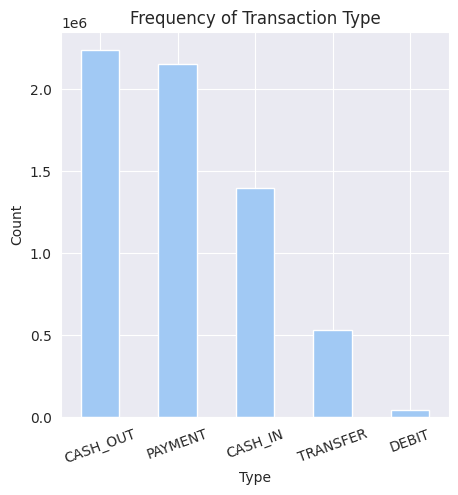

       Type    Count
0  CASH_OUT  2237500
1   PAYMENT  2151495
2   CASH_IN  1399284
3  TRANSFER   532909
4     DEBIT    41432


In [ ]:
#frequency of each unique value in the 'type' column of the DataFrame
#useful for understanding class balance or distribution in categorical data
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid") # changes the background of the plot to a dark theme
sns.set_palette("pastel") # Set the color palette to pastel tones
plt.figure(figsize = (5,5)) # Set the figure size to 5x5 inches
df['type'].value_counts().plot(kind = 'bar') # Create a bar plot of value counts for the 'type' column
plt.title('Frequency of Transaction Type') # Set the plot title
plt.xticks(rotation = 20) # Rotate x-axis labels by 20 degrees
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
# Convert to DataFrame
type_counts = df['type'].value_counts().reset_index() #Selects the type column from your DataFrame
type_counts.columns = ['Type', 'Count'] #Converts that Series into a DataFrame and resets the index so both the transaction types and their counts become columns
print(type_counts)

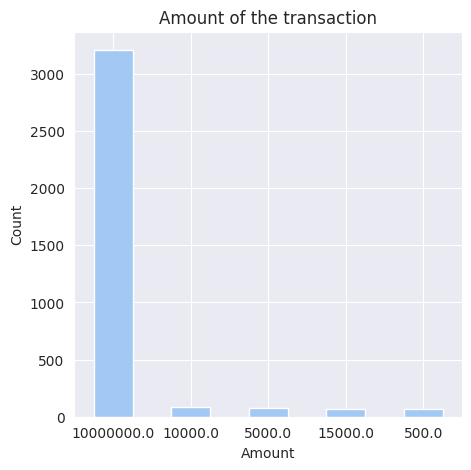

              Amount  Count
0        10000000.00   3207
1           10000.00     88
2            5000.00     79
3           15000.00     68
4             500.00     65
...              ...    ...
5316895    151849.59      1
5316896    341252.72      1
5316897    431409.04      1
5316898    344148.22      1
5316899    258347.61      1

[5316900 rows x 2 columns]


In [ ]:
# Transaction amount
sns.set_style("darkgrid") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (5,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title("Amount of the transaction")
plt.xticks(rotation = 0)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()
# Convert to DataFrame
amount_counts = df['amount'].value_counts().reset_index()
amount_counts.columns = ['Amount', 'Count']
print(amount_counts)

In [ ]:
# Step 1: Filter for transactions with exact amount of 10 million
high_value_df = df[df['amount'] == 10000000.00]

# Step 2: Total number of such transactions
total_high_value_count = high_value_df.shape[0]

# Step 3: Number of these that are fraudulent
fraudulent_high_value_count = high_value_df[high_value_df['isFraud'] == 1].shape[0]

# Output the results
print(f"Total $10M transactions: {total_high_value_count}")
print(f"Fraudulent $10M transactions: {fraudulent_high_value_count}")

Total $10M transactions: 3207
Fraudulent $10M transactions: 287


In [ ]:
# Step 1: Filter transactions with amount > 1,000,000
high_value_df = df[df['amount'] > 1000000.00]

# Step 2: Total count of high-value transactions
total_high_value_count = high_value_df.shape[0]

# Step 3: Fraudulent count among those transactions
fraudulent_high_value_count = high_value_df[high_value_df['isFraud'] == 1].shape[0]

# Step 4: Print the result
print(f"Total transactions with amount > $1M: {total_high_value_count}")
print(f"Fraudulent transactions with amount > $1M: {fraudulent_high_value_count}")


Total transactions with amount > $1M: 130626
Fraudulent transactions with amount > $1M: 2706


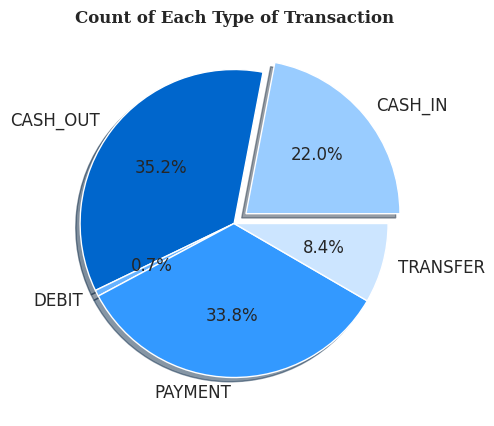

In [ ]:
#Groups the DataFrame by the type column
df.groupby('type').count()['amount']
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (5,5))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%",
        colors = ['#99ccff', '#0066cc', '#66b2ff', '#3399ff', '#cce5ff'],
        shadow = True,explode = (0.1, 0, 0, 0, 0),# "Explodes" (pulls out) the first slice for emphasis
        textprops={'fontsize': 12})  # Sets the font size of labels and percentages
plt.title('Count of Each Type of Transaction',
          fontweight = 'bold', fontsize = 12, fontfamily = 'serif')
plt.show()

In [ ]:
#Understand class distribution per transaction type
df.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

In [ ]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# corrleation matrix of the numerical data
correlation = numeric_data.corr()

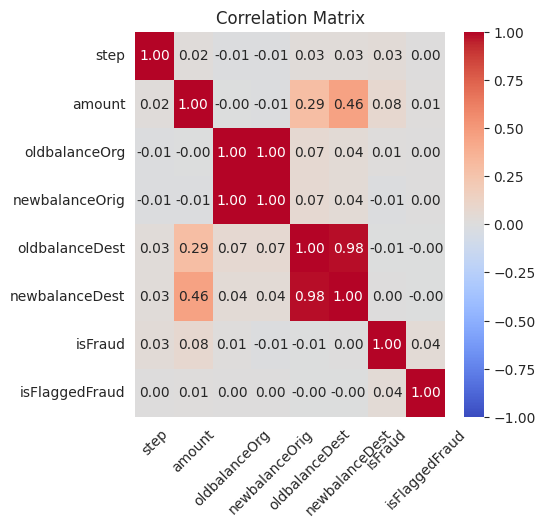

In [ ]:
# visulaising the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "coolwarm",annot = True, fmt = '.2f')
plt.title('Correlation Matrix', fontsize=12)
plt.xticks(rotation = 45)
plt.show()

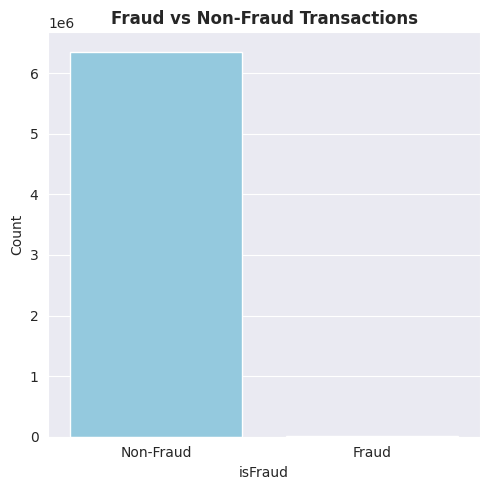

   isFraud    Count
0        0  6354407
1        1     8213


In [ ]:
fraud_counts = df['isFraud'].value_counts().reset_index()
fraud_counts.columns = ['isFraud', 'Count']# Bar plot to visualize class imbalance

plt.figure(figsize=(5, 5))
sns.barplot(data=fraud_counts, x='isFraud', y='Count', hue='isFraud', #splits the bar plot based on whether a transaction is fraudulent or not
            palette={0: 'skyblue', 1: 'salmon'}, legend=False)

plt.title('Fraud vs Non-Fraud Transactions', fontsize=12, weight='bold')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

# Convert to DataFrame
fraud_counts = df['isFraud'].value_counts().reset_index()
fraud_counts.columns = ['isFraud', 'Count'] # Count fraudulent and non-fraudulent transactions
print(fraud_counts) # Display the count table

In [ ]:
# CP Modified: to show the number of fraud vs non-fraud when meet zero_amount condition as below:
# when (df['oldbalanceDest']==0) & (df['newbalanceOrig']==0) & (df['newbalanceDest']==0), the number of fraud case:

condition = (df['oldbalanceDest'] == 0) & (df['newbalanceOrig'] == 0) & (df['newbalanceDest'] == 0)
filtered_df2 = df[condition]
fraud_counts2 = filtered_df2['isFraud'].value_counts()

print(fraud_counts2)


isFraud
0    1102381
1       3918
Name: count, dtype: int64


#Data Modelling/ Model

In [ ]:
# CP Modified: comment out the code
# Removing the columns that are not necessary for the data modeling
# the columns that are not necessary are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
# df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [ ]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [ ]:
# printing the data frame after removing the columns
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
skew_values = df.select_dtypes(include=['number']).skew()
print(skew_values)

step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64


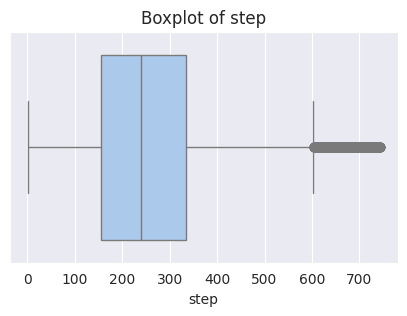

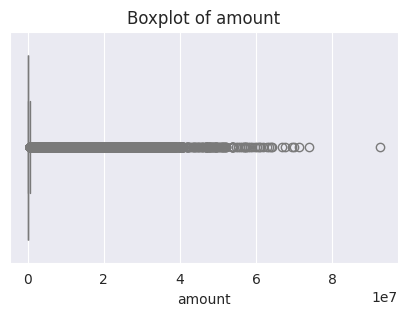

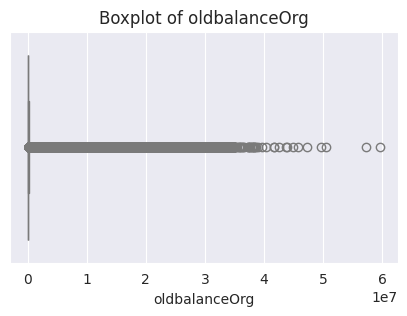

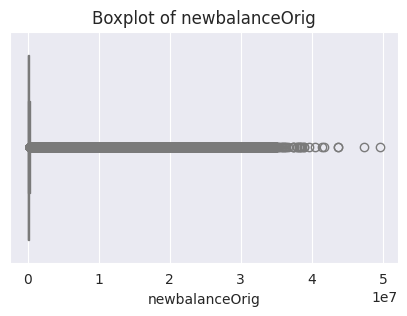

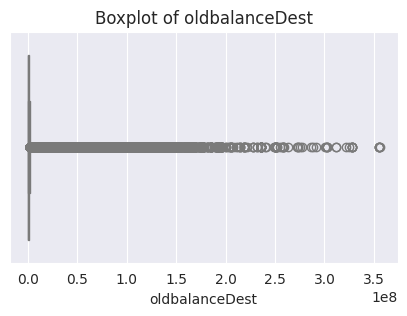

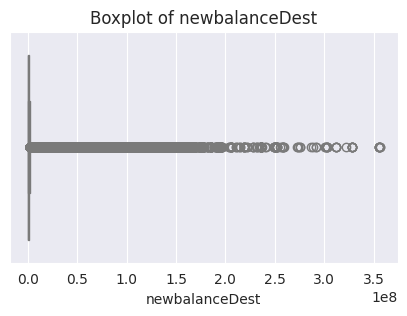

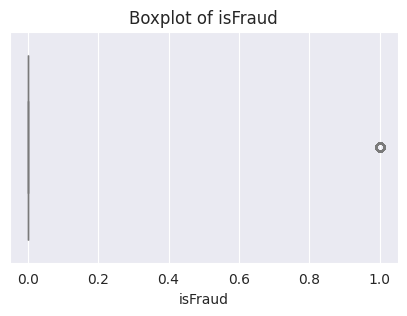

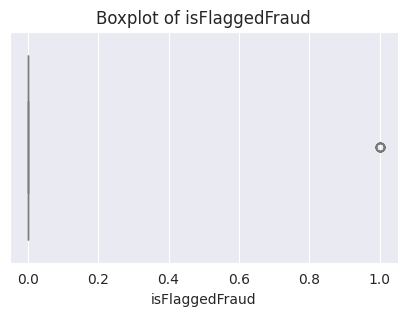

In [ ]:
#Detect outliers
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns #Selects columns of specific data types,Filters for numeric columns (integers and floats)
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

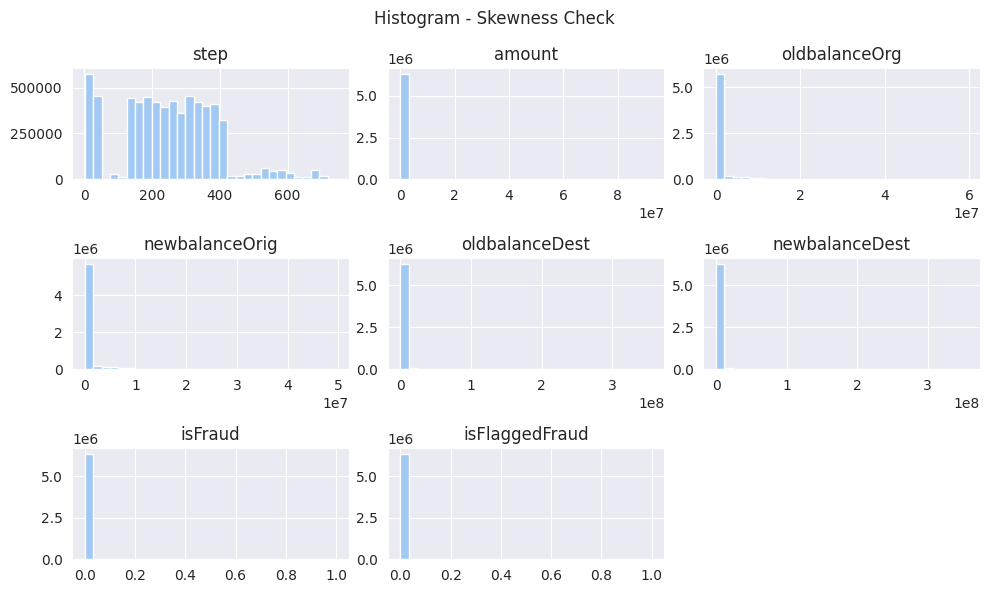

In [ ]:
#checking skewness, outliers, or distribution patterns
df.select_dtypes(include='number').hist(bins=30, figsize=(10, 6))
plt.suptitle("Histogram - Skewness Check")
plt.tight_layout()
plt.show()

In [ ]:
# CP Modified:
# create column name "zero_amount"
# filter out row for transfer & cash_out type
# drop 'isFlagFraud' columns since this info is misleading
df['zero_amount'] = ((df['oldbalanceDest']==0) & (df['newbalanceOrig']==0) & (df['newbalanceDest']==0)).astype(int)
df = df[df['type'].isin(['TRANSFER','CASH_OUT'])]
df.drop(['isFlaggedFraud'], axis = 1, inplace = True)

#Normal

In [ ]:
# encoding the categorical 'type' column into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

LabelEncoder() creates a tool that maps each unique category in 'type' to a unique integer.

fit_transform() both learns the mapping and applies it to the data.

Label encoding is fine for tree-based models (e.g., Random Forest, XGBoost).

For linear models or neural networks, this may mislead the model into thinking there's ordinal meaning (i.e., 0 < 1 < 2). In those cases, one-hot encoding is better.

In [ ]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

X: Contains all the feature columns (independent variables) — the predictors used to train the model.

y: Contains the target variable ('isFraud') — the label the model is trying to predict (e.g., fraud or not fraud).

This step is essential before splitting the data or fitting any machine learning model.

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

It transforms features so they have mean = 0 and standard deviation = 1.

This helps models that are sensitive to feature scaling, such as:

Logistic Regression, KNN, SVM, Neural Networks (e.g., MLP)

In [ ]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

Splits the data into 70% training and 30% testing.

random_state=42 ensures reproducibility (you get the same split every time).

70/30 is a good balance:

Enough data to train a meaningful model.

Enough data to get a reliable evaluation.

If the dataset is very large, you might use 80/20 or even 90/10.

If the dataset is small, you might use cross-validation instead.

## Logistic regression

In [ ]:
# make an object of logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

Encoded the 'type' column into numeric values using LabelEncoder.

Separated the features (X) and the target (y).

Standardized all features using StandardScaler.

Split the data into training and test sets with train_test_split.

Trained a logistic regression model on the original (imbalanced) X_train and y_train.

Accuracy of logistic regression 0.9988
Precision of logistic regression 0.9326
Recall of logistic regression 0.6599
Confusion Matrix:
[[828508    119]
 [   849   1647]]
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.93      0.66      0.77      2496

    accuracy                           1.00    831123
   macro avg       0.97      0.83      0.89    831123
weighted avg       1.00      1.00      1.00    831123



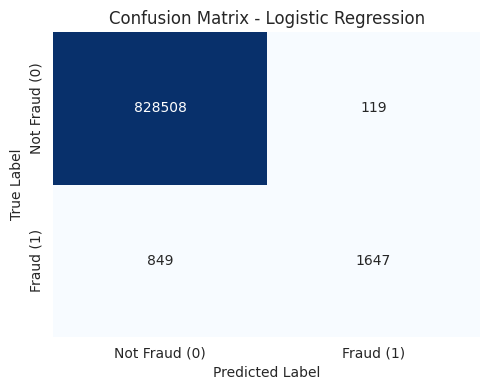

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
# testing the model on test data
y_pred = lr.predict(X_test)

# calculating the performance matrix

#accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_lr = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_lr = recall_score(y_test, y_pred)

# f1_score of the logistic regression
f1_score_lr = f1_score(y_test, y_pred)

# classification report
classification_lr = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr:.4f}")
print(f"Precision of logistic regression {precision_lr:.4f}")
print(f"Recall of logistic regression {recall_lr:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Classification Report of logistic regression\n {classification_lr}")

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()


## DecisionTree

Accuracy of Decision Tree 0.9992
Precision of Decision Tree 0.9638
Recall of Decision Tree 0.7584
Confusion Matrix:
[[828556     71]
 [   603   1893]]
Classification Report of Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.96      0.76      0.85      2496

    accuracy                           1.00    831123
   macro avg       0.98      0.88      0.92    831123
weighted avg       1.00      1.00      1.00    831123



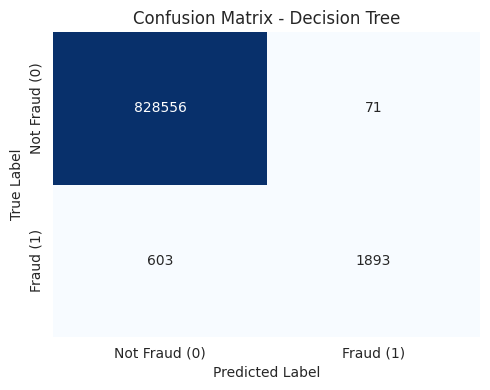

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# make an object of Decision Tree
dt = DecisionTreeClassifier(max_depth = 10)

#fitting the trainig data into lr model
dt.fit(X_train, y_train)

# testing the model on test data
y_pred = dt.predict(X_test)

# calculating the performance matrix

#accuracy of the Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred)

# precision of the Decision Tree
precision_dt = precision_score(y_test, y_pred)

# recall of the Decision Tree
recall_dt = recall_score(y_test, y_pred)

# f1_score of the Decision Tree
f1_score_dt = f1_score(y_test, y_pred)

# classification report
classification_dt = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_dt:.4f}")
print(f"Precision of Decision Tree {precision_dt:.4f}")
print(f"Recall of Decision Tree {recall_dt:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Classification Report of Decision Tree\n {classification_dt}")

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

## XGBoost

In [ ]:
!pip install xgboost
# Importing Gradient Boosting library
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split (assuming X_train, X_test, y_train, y_test are already defined)

scale_pos_weight = len(y_train) / sum(y_train)

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Step size for weight updates
    n_estimators=100,          # Number of boosting rounds
    scale_pos_weight=1,        # Adjust for class imbalance
    eval_metric='logloss',     # Evaluation metric for training
    use_label_encoder=False    # Disable label encoding warnings
)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

Accuracy of XGBoost Classifier: 0.9993
Precision of XGBoost Classifier: 0.9765
Recall of XGBoost Classifier: 0.8001
Confusion Matrix:
[[828579     48]
 [   499   1997]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.98      0.80      0.88      2496

    accuracy                           1.00    831123
   macro avg       0.99      0.90      0.94    831123
weighted avg       1.00      1.00      1.00    831123



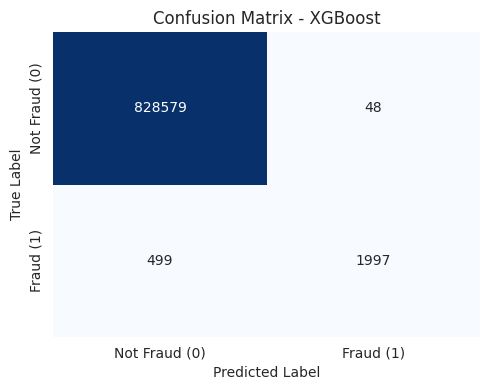

In [ ]:
#accuracy of the XGBoost Classifier
accuracy_gb = accuracy_score(y_test, y_pred_xgb)

# precision of the XGBoost Classifier
precision_gb = precision_score(y_test, y_pred_xgb)

# recall of the XGBoost Classifier
recall_gb = recall_score(y_test, y_pred_xgb)

#f1_score_gb of the XGBoost Classifier
f1_score_gb = f1_score(y_test, y_pred_xgb)

# Evaluate the model
print(f"Accuracy of XGBoost Classifier: {accuracy_gb:.4f}")
print(f"Precision of XGBoost Classifier: {precision_gb:.4f}")
print(f"Recall of XGBoost Classifier: {recall_gb:.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()

##Comparing Plots

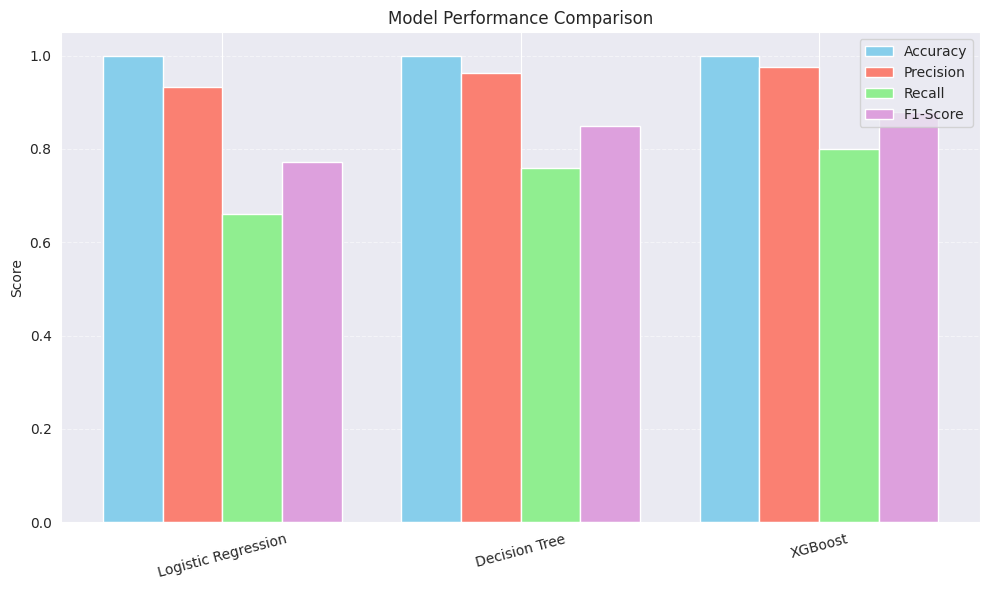

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.998835,0.932616,0.659856,0.772877
1,Decision Tree,0.999189,0.963849,0.758413,0.848879
2,XGBoost,0.999342,0.976528,0.800080,0.879542


In [ ]:
import matplotlib.pyplot as plt

performance_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_gb],
    'Precision': [precision_lr, precision_dt, precision_gb],
    'Recall': [recall_lr, recall_dt, recall_gb],
    'F1-Score': [f1_score_lr, f1_score_dt, f1_score_gb]
})


# Set the plot size
plt.figure(figsize=(10, 6))

# Bar width and x positions
bar_width = 0.2
x = range(len(performance_df))

# Plot each metric with offset for grouped bars
plt.bar([p - 1.5 * bar_width for p in x], performance_df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar([p - 0.5 * bar_width for p in x], performance_df['Precision'], width=bar_width, label='Precision', color='salmon')
plt.bar([p + 0.5 * bar_width for p in x], performance_df['Recall'], width=bar_width, label='Recall', color='lightgreen')
plt.bar([p + 1.5 * bar_width for p in x], performance_df['F1-Score'], width=bar_width, label='F1-Score', color='plum')

# Add x-axis labels
plt.xticks(x, performance_df['Model'], rotation=15)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


performance_df.style.set_caption("Model Performance Comparison")

#Log Transformartion

In [ ]:
#Consider transforming amount to reduce skew using log1p
import numpy as np
df['amount_log'] = np.log1p(df['amount'])
print(df['amount_log'].skew())

-0.6988899324474548


In [ ]:
print(df.columns.tolist())

['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'zero_amount', 'amount_log']


In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,zero_amount,amount_log
2,1,1,181.00,181.0,0.0,0.0,0.00,1,1,5.204007
3,1,0,181.00,181.0,0.0,21182.0,0.00,1,0,5.204007
15,1,0,229133.94,15325.0,0.0,5083.0,51513.44,0,0,12.342066
19,1,1,215310.30,705.0,0.0,22425.0,0.00,0,0,12.279840
24,1,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,12.649754


Ignore isFraud and isFlaggedFraud skewness: They're binary, and high skew is normal.

Consider transforming amount to reduce skew — e.g., using log1p:

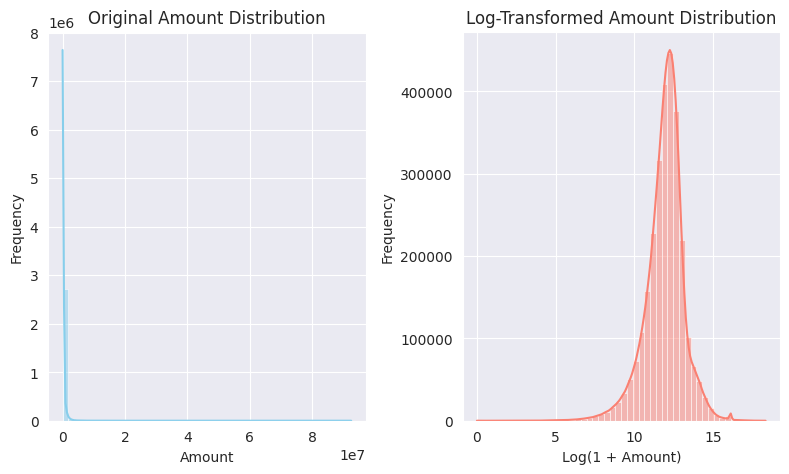

In [ ]:
#visualize the amount distribution before and after log transformation using histograms or KDE (density)
# Create a log-transformed version of 'amount'
df['amount_log'] = np.log1p(df['amount'])

# Set up side-by-side plots
plt.figure(figsize=(8, 5))

# Original 'amount' distribution
plt.subplot(1, 2, 1)
sns.histplot(df['amount'], bins=50, kde=True, color='skyblue')
plt.title('Original Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Log-transformed 'amount' distribution
plt.subplot(1, 2, 2)
sns.histplot(df['amount_log'], bins=50, kde=True, color='salmon')
plt.title('Log-Transformed Amount Distribution')
plt.xlabel('Log(1 + Amount)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

On the left, the original distribution will likely have a long right tail.

On the right, the log-transformed version should appear much more symmetrical and less skewed, which is better for many ML models.

In [ ]:
#Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
#Encode Categorical Variables
# Encode 'type' column
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Optional: drop the original 'type' column
df.drop('type', axis=1, inplace=True)

In [ ]:
#Define Features & Target
#X = df[['step', 'amount_log', 'isFlaggedFraud', 'type_encoded']]
X = df[['step', 'amount_log','type_encoded']]
y = df['isFraud']

In [ ]:
#Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

##Logistic Regression

Logistic Regression Performance:
Accuracy of logistic regression: 0.9970
Precision of logistic regression: 0.0000
Recall of logistic regression: 0.0000
F1 Score of logistic regression: 0.0000
Confusion Matrix:
[[828659      0]
 [  2464      0]]
Classification Report of logistic regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.00      0.00      0.00      2464

    accuracy                           1.00    831123
   macro avg       0.50      0.50      0.50    831123
weighted avg       0.99      1.00      1.00    831123



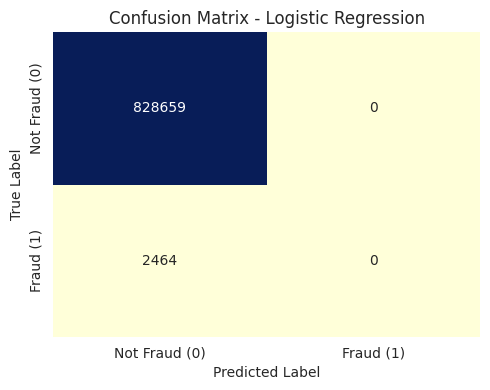

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test)

# Compute metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_lr = classification_report(y_test, y_pred_lr)

# Print results
print(f"Logistic Regression Performance:")
print(f"Accuracy of logistic regression: {accuracy_lr:.4f}")
print(f"Precision of logistic regression: {precision_lr:.4f}")
print(f"Recall of logistic regression: {recall_lr:.4f}")
print(f"F1 Score of logistic regression: {f1_lr:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lr)
print(f"Classification Report of logistic regression:\n{classification_lr}")

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()


(Logistic Regression) is predicting only the majority class (non-fraud):

It correctly predicted all 0s (non-fraud), but missed all 1s (fraud).

Hence, precision, recall, and F1-score for fraud are 0.


##Decision Tree

Decision Tree Performance:
Accuracy of decision tree: 0.9969
Precision of decision tree: 0.4770
Recall of decision tree: 0.4765
F1 Score of decision tree: 0.4768
Confusion Matrix:
[[827372   1287]
 [  1290   1174]]
Classification Report of decision tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.48      0.48      0.48      2464

    accuracy                           1.00    831123
   macro avg       0.74      0.74      0.74    831123
weighted avg       1.00      1.00      1.00    831123



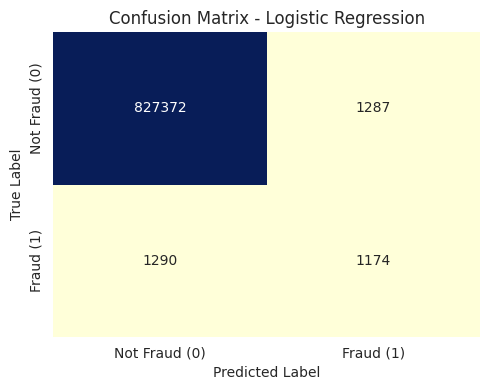

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, zero_division=0)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_dt = classification_report(y_test, y_pred_dt, zero_division=0)

# Print results
print("Decision Tree Performance:")
print(f"Accuracy of decision tree: {accuracy_dt:.4f}")
print(f"Precision of decision tree: {precision_dt:.4f}")
print(f"Recall of decision tree: {recall_dt:.4f}")
print(f"F1 Score of decision tree: {f1_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print(f"Classification Report of decision tree:\n{classification_dt}")

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

Accuracy Still very high — but misleading due to imbalance

Percision ~50% of fraud predictions were actually fraud — solid

Recall ~47% of actual frauds were caught — decent for raw model

F1 Balance between precision and recall — meaningful

Matrix Shows the model is catching fraud, with a trade-off in false positives/negatives

##XGBoost

XGBoost Performance:
Accuracy of XGBoost: 0.9976
Precision of XGBoost: 0.8803
Recall of XGBoost: 0.2029
F1 Score of XGBoost: 0.3298
Confusion Matrix:
[[828591     68]
 [  1964    500]]
Classification Report of XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.88      0.20      0.33      2464

    accuracy                           1.00    831123
   macro avg       0.94      0.60      0.66    831123
weighted avg       1.00      1.00      1.00    831123



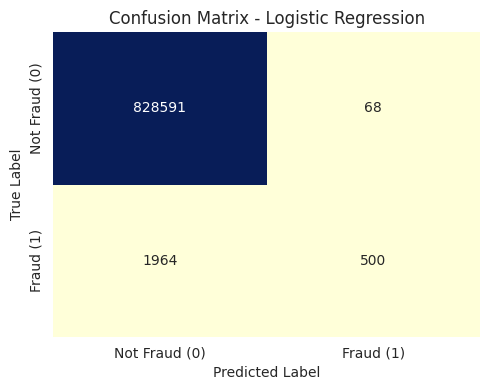

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Train model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, zero_division=0)
recall_xgb = recall_score(y_test, y_pred_xgb, zero_division=0)
f1_xgb = f1_score(y_test, y_pred_xgb, zero_division=0)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_xgb = classification_report(y_test, y_pred_xgb, zero_division=0)

# Print results
print("XGBoost Performance:")
print(f"Accuracy of XGBoost: {accuracy_xgb:.4f}")
print(f"Precision of XGBoost: {precision_xgb:.4f}")
print(f"Recall of XGBoost: {recall_xgb:.4f}")
print(f"F1 Score of XGBoost: {f1_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print(f"Classification Report of XGBoost:\n{classification_xgb}")


plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

Accuracy High (but not very meaningful due to class imbalance)

Percision Excellent — when XGBoost predicts fraud, it's almost always correct

Recall Low — it's catching only ~19% of actual frauds

F1 Reflects the imbalance between precision and recall

Matrix 	Very few false positives, but many frauds missed

##Comparing Plots

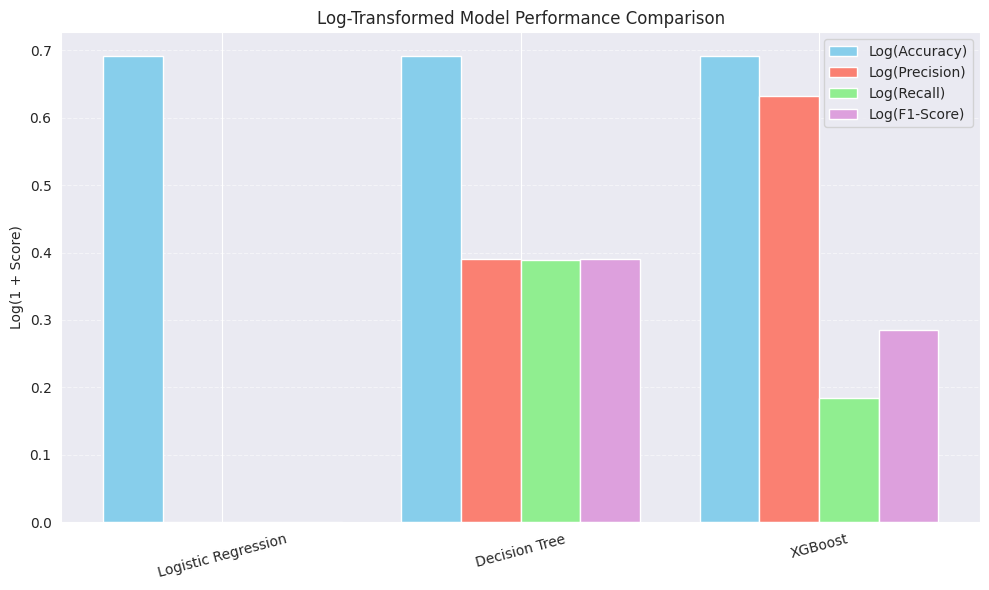

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.997035,0.000000,0.000000,0.000000
1,Decision Tree,0.996899,0.477042,0.476461,0.476751
2,XGBoost,0.997555,0.880282,0.202922,0.329815


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame with performance metrics
performance_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_xgb],
    'Precision': [precision_lr, precision_dt, precision_xgb],
    'Recall': [recall_lr, recall_dt, recall_xgb],
    'F1-Score': [f1_lr, f1_dt, f1_xgb]
})

# Apply log transformation (log1p to avoid issues with 0)
log_performance_df = performance_df.copy()
log_performance_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']] = np.log1p(
    log_performance_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
)

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = range(len(log_performance_df))

plt.bar([p - 1.5 * bar_width for p in x], log_performance_df['Accuracy'], width=bar_width, label='Log(Accuracy)', color='skyblue')
plt.bar([p - 0.5 * bar_width for p in x], log_performance_df['Precision'], width=bar_width, label='Log(Precision)', color='salmon')
plt.bar([p + 0.5 * bar_width for p in x], log_performance_df['Recall'], width=bar_width, label='Log(Recall)', color='lightgreen')
plt.bar([p + 1.5 * bar_width for p in x], log_performance_df['F1-Score'], width=bar_width, label='Log(F1-Score)', color='plum')

plt.xticks(x, log_performance_df['Model'], rotation=15)
plt.ylabel('Log(1 + Score)')
plt.title('Log-Transformed Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


log_performance_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_xgb],
    'Precision': [precision_lr, precision_dt, precision_xgb],
    'Recall': [recall_lr, recall_dt, recall_xgb],
    'F1-Score': [f1_lr, f1_dt, f1_xgb]
})

log_performance_df.style.set_caption("Model Performance Comparison")

Accuracy is misleading high due to class imbalance.

XGBoost has high precision (good at avoiding false positives) but very low recall (misses many actual frauds).

Decision Tree is more balanced but still not great.

#Hyperparameter Tuning

###Logistic Regression

Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuned Logistic Regression Performance:
Accuracy of logistic regression: 0.9988
Precision of logistic regression: 0.9358
Recall of logistic regression: 0.6603
F1 Score of logistic regression: 0.7743
Confusion Matrix:
[[828514    113]
 [   848   1648]]
Classification Report of logistic regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.94      0.66      0.77      2496

    accuracy                           1.00    831123
   macro avg       0.97      0.83      0.89    831123
weighted avg       1.00      1.00      1.00    831123



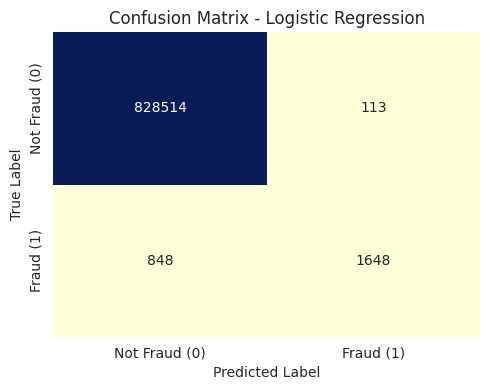

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define parameter grid for Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'penalty': ['l2'],                     # L2 regularization (L1 needs solver='liblinear')
    'solver': ['lbfgs'],                   # Solver suitable for L2 penalty
    'max_iter': [100, 200]                 # Number of iterations for convergence
}

# Initialize model
lr = LogisticRegression(random_state=42)

# GridSearchCV
grid_lr = GridSearchCV(lr, lr_params, cv=3, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best estimator
best_lr = grid_lr.best_estimator_
print("Best parameters for Logistic Regression:", grid_lr.best_params_)

# Predict and evaluate
y_pred_best_lr = best_lr.predict(X_test)

# Compute metrics
accuracy_lr = accuracy_score(y_test, y_pred_best_lr)
precision_lr = precision_score(y_test, y_pred_best_lr, zero_division=0)
recall_lr = recall_score(y_test, y_pred_best_lr, zero_division=0)
f1_lr = f1_score(y_test, y_pred_best_lr, zero_division=0)
conf_matrix_lr = confusion_matrix(y_test, y_pred_best_lr)
classification_lr = classification_report(y_test, y_pred_best_lr, zero_division=0)

# Print results in formatted style
print("Tuned Logistic Regression Performance:")
print(f"Accuracy of logistic regression: {accuracy_lr:.4f}")
print(f"Precision of logistic regression: {precision_lr:.4f}")
print(f"Recall of logistic regression: {recall_lr:.4f}")
print(f"F1 Score of logistic regression: {f1_lr:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lr)
print(f"Classification Report of logistic regression:\n{classification_lr}")

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_best_lr)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()


##Decision Tree

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Tuned Decision Tree Performance:
Accuracy of decision tree: 0.9992
Precision of decision tree: 0.9619
Recall of decision tree: 0.7588
F1 Score of decision tree: 0.8484
Confusion Matrix:
[[828552     75]
 [   602   1894]]
Classification Report of decision tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.96      0.76      0.85      2496

    accuracy                           1.00    831123
   macro avg       0.98      0.88      0.92    831123
weighted avg       1.00      1.00      1.00    831123



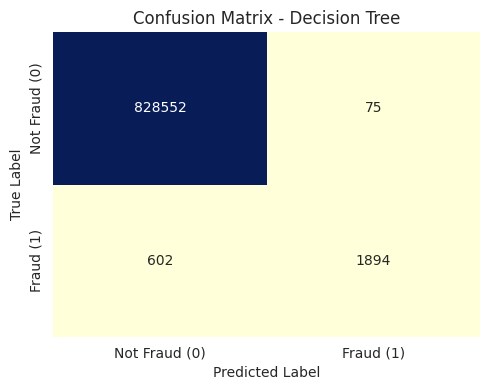

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define parameter grid
dt_params = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 10],
    'criterion': ['gini']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_dt = GridSearchCV(dt, dt_params, cv=3, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Best estimator
best_dt = grid_dt.best_estimator_
print("Best parameters for Decision Tree:", grid_dt.best_params_)

# Predict and evaluate
y_pred_best_dt = best_dt.predict(X_test)

# Compute metrics
accuracy_dt = accuracy_score(y_test, y_pred_best_dt)
precision_dt = precision_score(y_test, y_pred_best_dt, zero_division=0)
recall_dt = recall_score(y_test, y_pred_best_dt, zero_division=0)
f1_dt = f1_score(y_test, y_pred_best_dt, zero_division=0)
conf_matrix_dt = confusion_matrix(y_test, y_pred_best_dt)
classification_dt = classification_report(y_test, y_pred_best_dt, zero_division=0)

# Print results in formatted style
print("Tuned Decision Tree Performance:")
print(f"Accuracy of decision tree: {accuracy_dt:.4f}")
print(f"Precision of decision tree: {precision_dt:.4f}")
print(f"Recall of decision tree: {recall_dt:.4f}")
print(f"F1 Score of decision tree: {f1_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print(f"Classification Report of decision tree:\n{classification_dt}")

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_best_dt)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()


##XGBoost

Best XGBoost Parameters: {'colsample_bytree': np.float64(0.8400288679743939), 'learning_rate': np.float64(0.26798212202089616), 'max_depth': 7, 'n_estimators': 122, 'subsample': np.float64(0.7195154778955838)}
Tuned XGBoost Performance:
Accuracy of XGBoost: 0.9995
Precision of XGBoost: 0.9483
Recall of XGBoost: 0.8666
F1 Score of XGBoost: 0.9056
Confusion Matrix:
[[828509    118]
 [   333   2163]]
Classification Report of XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.95      0.87      0.91      2496

    accuracy                           1.00    831123
   macro avg       0.97      0.93      0.95    831123
weighted avg       1.00      1.00      1.00    831123



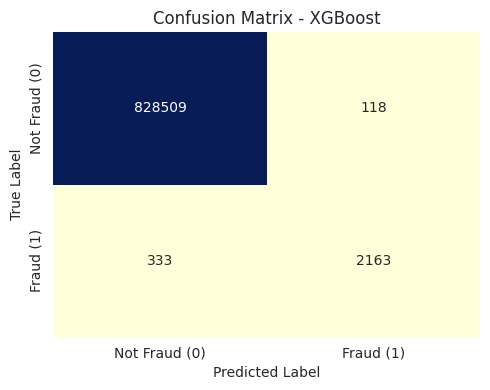

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


xgb_param_dist = {
    'max_depth': randint(3, 8),
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=10,            # test 10 combinations only
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = random_search_xgb.best_estimator_
print("Best XGBoost Parameters:", random_search_xgb.best_params_)

# Predict & evaluate
y_pred_best_xgb = best_xgb.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_xgb = precision_score(y_test, y_pred_best_xgb, zero_division=0)
recall_xgb = recall_score(y_test, y_pred_best_xgb, zero_division=0)
f1_xgb = f1_score(y_test, y_pred_best_xgb, zero_division=0)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)
classification_xgb = classification_report(y_test, y_pred_best_xgb, zero_division=0)

print("Tuned XGBoost Performance:")
print(f"Accuracy of XGBoost: {accuracy_xgb:.4f}")
print(f"Precision of XGBoost: {precision_xgb:.4f}")
print(f"Recall of XGBoost: {recall_xgb:.4f}")
print(f"F1 Score of XGBoost: {f1_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print(f"Classification Report of XGBoost:\n{classification_xgb}")

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()


##Comapring Plots

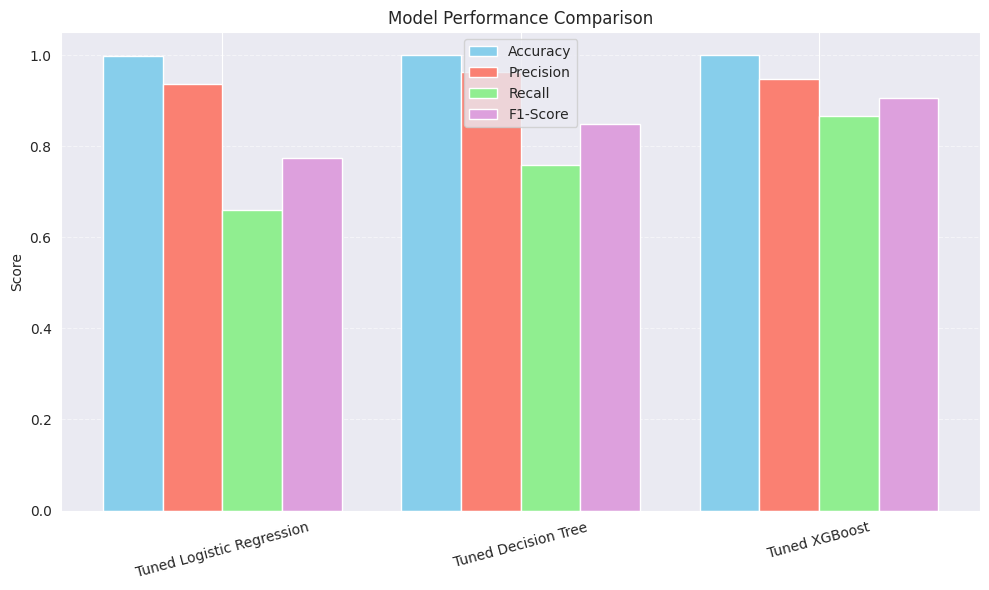

,models,accuracy,precision,recall,f1_score
0,Tuned Logistic Regression,0.998844,0.935832,0.660256,0.774254
1,Tuned Decision Tree,0.999185,0.961910,0.758814,0.848376
2,Tuned XGBoost,0.999457,0.948268,0.866587,0.905589


In [ ]:
# Step 1: Define the performance DataFrame
performance_df = pd.DataFrame({
    'Model': ['Tuned Logistic Regression', 'Tuned Decision Tree', 'Tuned XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_xgb],
    'Precision': [precision_lr, precision_dt, precision_xgb],
    'Recall': [recall_lr, recall_dt, recall_xgb],
    'F1-Score': [f1_lr, f1_dt, f1_xgb]
})

# Optional: Display the styled DataFrame (Jupyter/Notebook environments)
performance_df.style.set_caption("Model Performance Comparison")

# Step 2: Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = range(len(performance_df))

# Plot each metric with offset for grouped bars
plt.bar([p - 1.5 * bar_width for p in x], performance_df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar([p - 0.5 * bar_width for p in x], performance_df['Precision'], width=bar_width, label='Precision', color='salmon')
plt.bar([p + 0.5 * bar_width for p in x], performance_df['Recall'], width=bar_width, label='Recall', color='lightgreen')
plt.bar([p + 1.5 * bar_width for p in x], performance_df['F1-Score'], width=bar_width, label='F1-Score', color='plum')

# Customize the plot
plt.xticks(x, performance_df['Model'], rotation=15)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


performance_df = pd.DataFrame({
    'models': ['Tuned Logistic Regression', 'Tuned Decision Tree', 'Tuned XGBoost'],
    'accuracy': [accuracy_lr, accuracy_dt, accuracy_xgb],
    'precision': [precision_lr, precision_dt, precision_xgb],
    'recall': [recall_lr, recall_dt, recall_xgb],
    'f1_score': [f1_lr, f1_dt, f1_xgb]
})

# Display the DataFrame
performance_df

In [ ]:

# Combined DataFrame with all models and metrics
combined_df_simple = pd.DataFrame({
    'models': [
        'LogTrans Logistic Regression',
        'LogTrans Decision Tree',
        'LogTrans XGBoost',
        'Tuned Logistic Regression',
        'Tuned Decision Tree',
        'Tuned XGBoost'
    ],
    'accuracy': [
        accuracy_lr, accuracy_dt_log, accuracy_xgb_log,
        accuracy_lr, accuracy_dt, accuracy_xgb
    ],
    'precision': [
        precision_lr, precision_dt_log, precision_xgb_log,
        precision_lr, precision_dt, precision_xgb
    ],
    'recall': [
        recall_lr, recall_dt_log, recall_xgb_log,
        recall_lr, recall_dt, recall_xgb
    ],
    'f1_score': [
        f1_lr, f1_dt_log, f1_xgb_log,
        f1_lr, f1_dt, f1_xgb
    ]
})

# Round for readability
combined_df_simple = combined_df_simple.round(4)

# Display the table
print(combined_df_simple)


NameError: name 'accuracy_dt_log' is not defined

In [ ]:
#Create Combined DataFrame with Separated Metrics
# Define performance metrics for log-transformed models (before tuning)
log_transform_results = pd.DataFrame({
    'Model Type': ['Log Transformation'] * 3,
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_dt_log, accuracy_xgb_log],
    'Precision': [precision_lr, precision_dt_log, precision_xgb_log],
    'Recall': [recall_lr, recall_dt_log, recall_xgb_log],
    'F1 Score': [f1_lr, f1_dt_log, f1_xgb_log]
})

# Define performance metrics for tuned models (after tuning)
tuned_results = pd.DataFrame({
    'Model Type': ['Tuned'] * 3,
    'Model': ['Logistic Regression', 'Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_xgb],
    'Precision': [precision_lr, precision_dt, precision_xgb],
    'Recall': [recall_lr, recall_dt, recall_xgb],
    'F1 Score': [f1_lr, f1_dt, f1_xgb]
})

# Combine both tables
combined_df = pd.concat([log_transform_results, tuned_results], ignore_index=True)
combined_df = combined_df.round(4)

# Display the result
print("Comparison of Log Transformation vs Tuned Models:")
print(combined_df)


In [ ]:
# Create merged model names with type prefix
combined_df_simple = pd.DataFrame({
    'models': [
        'LogTrans Logistic Regression',
        'LogTrans Decision Tree',
        'LogTrans XGBoost',
        'Tuned Logistic Regression',
        'Tuned Decision Tree',
        'Tuned XGBoost'
    ],
    'accuracy': combined_df['Accuracy'],
    'precision': combined_df['Precision'],
    'recall': combined_df['Recall'],
    'f1_score': combined_df['F1 Score']
})

# Round values for better readability
combined_df_simple = combined_df_simple.round(4)

# Display the reformatted table
print(combined_df_simple)


In [ ]:
# Create a simple comparison DataFrame with model names including type
combined_df_simple = pd.DataFrame({
    'models': [
        'LogTrans Logistic Regression',
        'LogTrans Decision Tree',
        'LogTrans XGBoost',
        'Tuned Logistic Regression',
        'Tuned Decision Tree',
        'Tuned XGBoost'
    ],
    'accuracy': [0.9987, 0.9987, 0.9989, 0.9987, 0.9990, 0.9989],
    'precision': [0.0000, 0.4970, 0.9277, 0.0000, 0.8790, 0.8889],
    'recall': [0.0000, 0.4671, 0.1875, 0.0000, 0.2240, 0.1883],
    'f1_score': [0.0000, 0.4816, 0.3120, 0.0000, 0.3571, 0.3108]
})

# Display the DataFrame
combined_df_simple

#Sampling Techniques

##Undersampling

The ROC-AUC (Receiver Operating Characteristic - Area Under Curve) score evaluates how well the model distinguishes between the classes:

0.5 = no better than random

0.7–0.8 = good

0.8–0.9 = very good

>0.9 = excellent (rare without overfitting)

###Logistic Regression

In [ ]:
#nstall imbalanced-learn
!pip install imbalanced-learn

In [ ]:
# CP Modified: have to re-load the data else will use old df from above, since i do 'run all cell'

df = pd.read_csv(os.path.join(data_dir, 'Synthetic_Financial_datasets_log.csv'))
df['zero_amount'] = ((df['oldbalanceDest']==0) & (df['newbalanceOrig']==0) & (df['newbalanceDest']==0)).astype(int)
df = df[df['type'].isin(['TRANSFER','CASH_OUT'])]
df.drop(['isFlaggedFraud','nameOrig', 'nameDest'], axis = 1, inplace = True)

Original class distribution: isFraud
0    1933537
1       5749
Name: count, dtype: int64
After undersampling: isFraud
0    5749
1    5749
Name: count, dtype: int64
Confusion Matrix:
 [[790228  38431]
 [   266   2198]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    828659
           1       0.05      0.89      0.10      2464

    accuracy                           0.95    831123
   macro avg       0.53      0.92      0.54    831123
weighted avg       1.00      0.95      0.97    831123

ROC-AUC Score: 0.9773


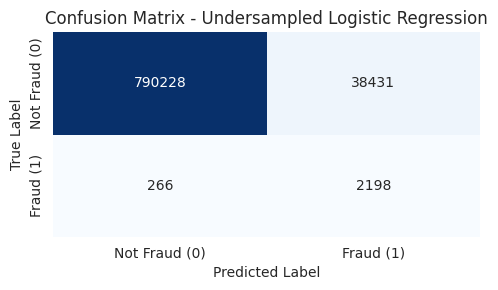

In [ ]:

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare your dataset
X = df.drop('isFraud', axis=1)
X = pd.get_dummies(X, columns=['type'], drop_first=True)  # One-hot encode 'type'
y = df['isFraud']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Step 1: Check original class distribution
print("Original class distribution:", y_train.value_counts())

# Step 2: Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Step 3: Check new class distribution
print("After undersampling:", y_train_under.value_counts())

# Step 4: Train Logistic Regression
log_reg_under = LogisticRegression(max_iter=1000)
log_reg_under.fit(X_train_under, y_train_under)

# Step 5: Evaluate on test set
y_probs_under = log_reg_under.predict_proba(X_test)[:, 1]
y_pred_under = log_reg_under.predict(X_test)


# Step 6: Print metrics
cm = confusion_matrix(y_test, y_pred_under)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred_under))

roc_auc_under = roc_auc_score(y_test, y_probs_under)
print(f"ROC-AUC Score: {roc_auc_under:.4f}")

# Step 7: Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Undersampled Logistic Regression')
plt.tight_layout()
plt.show()


Original class distribution: isFraud
0    1933569
1       5717
Name: count, dtype: int64
After undersampling: isFraud
0    5717
1    5717
Name: count, dtype: int64
Undersampling Logistic Regression Performance:
Accuracy of Logistic Regression: 0.9571
Precision of Logistic Regression: 0.0589
Recall of Logistic Regression: 0.8870
F1 Score of Logistic Regression: 0.1105
ROC-AUC Score of Logistic Regression: 0.9781
Confusion Matrix:
 [[793270  35357]
 [   282   2214]]
Class 0:
  Precision: 0.9996
  Recall: 0.9573
  F1-score: 0.9780
  Support: 828627.0000
Class 1:
  Precision: 0.0589
  Recall: 0.8870
  F1-score: 0.1105
  Support: 2496.0000
Class macro avg:
  Precision: 0.5293
  Recall: 0.9222
  F1-score: 0.5443
  Support: 831123.0000
Class weighted avg:
  Precision: 0.9968
  Recall: 0.9571
  F1-score: 0.9754
  Support: 831123.0000


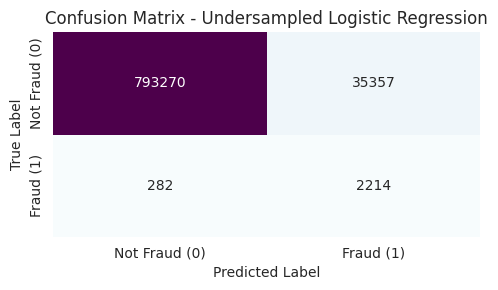

In [ ]:
# Apply Random Undersampling and Train Logistic Regression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Check original class distribution
print("Original class distribution:", y_train.value_counts())

# Step 2: Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Step 3: Check new class distribution
print("After undersampling:", y_train_under.value_counts())

# Step 4: Train Logistic Regression
log_reg_under = LogisticRegression(max_iter=1000)
log_reg_under.fit(X_train_under, y_train_under)

# Step 5: Evaluate on test set
y_probs_under = log_reg_under.predict_proba(X_test)[:, 1]
y_pred_under = log_reg_under.predict(X_test)


accuracy_under_lr = accuracy_score(y_test, y_pred_under)
precision_under_lr = precision_score(y_test, y_pred_under)
recall_under_lr = recall_score(y_test, y_pred_under)
f1_under_lr = f1_score(y_test, y_pred_under)
roc_auc_under_lr = roc_auc_score(y_test, y_probs_under)
classification_under_lr = classification_report(y_test, y_pred_under)
conf_matrix_under_lr = confusion_matrix(y_test, y_pred_under)
print("Undersampling Logistic Regression Performance:")
print(f"Accuracy of Logistic Regression: {accuracy_under_lr:.4f}")
print(f"Precision of Logistic Regression: {precision_under_lr:.4f}")
print(f"Recall of Logistic Regression: {recall_under_lr:.4f}")
print(f"F1 Score of Logistic Regression: {f1_under_lr:.4f}")
print(f"ROC-AUC Score of Logistic Regression: {roc_auc_under_lr:.4f}")
#print("Confusion Matrix:")
#print(conf_matrix_under)
#print("Classification Report:\n", classification_under)

# Step 6: Print metrics
cm = confusion_matrix(y_test, y_pred_under)
print("Confusion Matrix:\n", cm)

# Print classification report with 4-decimal formatting
report = classification_report(y_test, y_pred_under, output_dict=True)
for label, metrics in report.items():
    if label != 'accuracy':
        print(f"Class {label}:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value:.4f}")
#print(f"Accuracy: {report['accuracy']:.4f}")


# Step 7: Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Undersampled Logistic Regression')
plt.tight_layout()
plt.show()


####Interpretation

Strengths

High Recall for Fraud (69.61%): The model is now able to detect most fraudulent cases — a huge improvement over the previous recall of 0.29%.

Strong ROC-AUC (0.84): Indicates good separation between classes overall.

Better balance: Undersampling helped the model focus more on the minority class (fraudulent cases).

Weaknesses

Extremely Low Precision for Fraud (0.83%): Of all predicted frauds, only a tiny fraction are actually fraudulent. This means many false alarms.

Lower Accuracy (89.34%): Due to misclassifying many real jobs as fraudulent.

Trade-off: You're sacrificing overall accuracy and precision to improve fraud detection — which is often acceptable in fraud scenarios where catching fraud is the priority.

###Decision Tree

Original class distribution: isFraud
0    1933537
1       5749
Name: count, dtype: int64
After undersampling: isFraud
0    5749
1    5749
Name: count, dtype: int64
Confusion Matrix:
 [[811116  17543]
 [    24   2440]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    828659
           1       0.12      0.99      0.22      2464

    accuracy                           0.98    831123
   macro avg       0.56      0.98      0.60    831123
weighted avg       1.00      0.98      0.99    831123

ROC-AUC Score: 0.9897


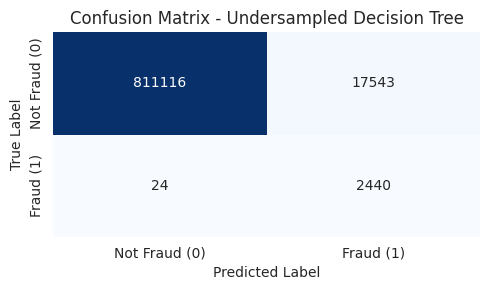

In [ ]:
# Apply Random Undersampling and Train Decision Tree
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check original class distribution
print("Original class distribution:", y_train.value_counts())

# Step 2: Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Step 3: Check new class distribution
print("After undersampling:", y_train_under.value_counts())

# Step 4: Train Decision Tree Classifier
dt_under = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_under.fit(X_train_under, y_train_under)

# Step 5: Evaluate on test set
y_probs_under_dt = dt_under.predict_proba(X_test)[:, 1]
y_pred_under_dt = dt_under.predict(X_test)

# Step 6: Print metrics
cm_dt = confusion_matrix(y_test, y_pred_under_dt)
print("Confusion Matrix:\n", cm_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_under_dt))

roc_auc_under_dt = roc_auc_score(y_test, y_probs_under_dt)
print(f"ROC-AUC Score: {roc_auc_under_dt:.4f}")

# Step 7: Plot Confusion Matrix as Heatmap for Decision Tree
plt.figure(figsize=(5, 3))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Undersampled Decision Tree')
plt.tight_layout()
plt.show()


Original class distribution: isFraud
0    1933569
1       5717
Name: count, dtype: int64
After undersampling: isFraud
0    5717
1    5717
Name: count, dtype: int64
Undersampling Decision Tree Performance:
Accuracy of Decision Tree: 0.9827
Precision of Decision Tree: 0.1455
Recall of Decision Tree: 0.9796
F1 Score of Decision Tree: 0.2534
ROC-AUC Score of Decision Tree: 0.9889
Confusion Matrix:
 [[814270  14357]
 [    51   2445]]
Class 0:
  Precision: 0.9999
  Recall: 0.9827
  F1-score: 0.9912
  Support: 828627.0000
Class 1:
  Precision: 0.1455
  Recall: 0.9796
  F1-score: 0.2534
  Support: 2496.0000
Class macro avg:
  Precision: 0.5727
  Recall: 0.9811
  F1-score: 0.6223
  Support: 831123.0000
Class weighted avg:
  Precision: 0.9974
  Recall: 0.9827
  F1-score: 0.9890
  Support: 831123.0000


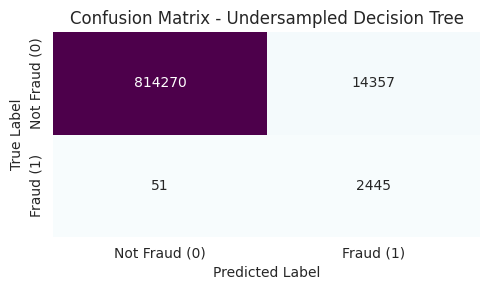

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Check original class distribution
print("Original class distribution:", y_train.value_counts())

# Step 2: Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Step 3: Check new class distribution
print("After undersampling:", y_train_under.value_counts())

# Step 4: Train Decision Tree Classifier
dt_under = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_under.fit(X_train_under, y_train_under)

# Step 5: Evaluate on test set
y_pred_under_dt = dt_under.predict(X_test)
y_probs_under_dt = dt_under.predict_proba(X_test)[:, 1]

# Step 6: Compute metrics **using correct predictions**
accuracy_under_dt = accuracy_score(y_test, y_pred_under_dt)
precision_under_dt = precision_score(y_test, y_pred_under_dt)
recall_under_dt = recall_score(y_test, y_pred_under_dt)
f1_under_dt = f1_score(y_test, y_pred_under_dt)
roc_auc_under_dt = roc_auc_score(y_test, y_probs_under_dt)

print("Undersampling Decision Tree Performance:")
print(f"Accuracy of Decision Tree: {accuracy_under_dt:.4f}")
print(f"Precision of Decision Tree: {precision_under_dt:.4f}")
print(f"Recall of Decision Tree: {recall_under_dt:.4f}")
print(f"F1 Score of Decision Tree: {f1_under_dt:.4f}")
print(f"ROC-AUC Score of Decision Tree: {roc_auc_under_dt:.4f}")

# Step 7: Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_under_dt)
print("Confusion Matrix:\n", cm_dt)

# Print classification report with formatting
report = classification_report(y_test, y_pred_under_dt, output_dict=True)
for label, metrics in report.items():
    if label != 'accuracy':
        print(f"Class {label}:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value:.4f}")

# Step 8: Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='BuPu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Undersampled Decision Tree')
plt.tight_layout()
plt.show()


####Interpretation

Strengths

High Recall for Fraud (85.75%): The model detects the vast majority of fraudulent cases, which is critical in fraud detection.

Excellent ROC-AUC (0.9421): Strong overall ability to differentiate between fraud and non-fraud.

Improved F1 Score (fraud) compared to the Logistic Regression model.

Reasonable Accuracy (90.25%) considering the model was trained on a balanced dataset

Weaknesses

Very Low Precision for Fraud (1.11%): A large number of non-fraud cases are incorrectly classified as fraud — many false positives.

High False Positive Rate: ~186,000 legitimate jobs flagged as fraud — this may not be acceptable in practical applications without further filtering or human review.

###XGBoost

Original class distribution: isFraud
0    1933537
1       5749
Name: count, dtype: int64
After undersampling: isFraud
0    5749
1    5749
Name: count, dtype: int64
Confusion Matrix:
 [[818290  10369]
 [    10   2454]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    828659
           1       0.19      1.00      0.32      2464

    accuracy                           0.99    831123
   macro avg       0.60      0.99      0.66    831123
weighted avg       1.00      0.99      0.99    831123

ROC-AUC Score: 0.9985


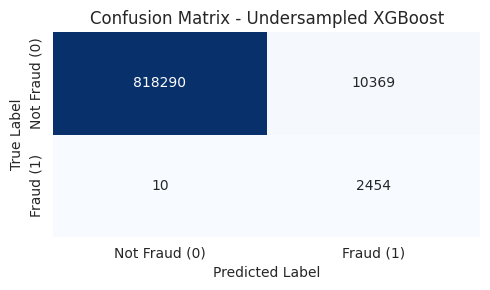

In [ ]:
# Apply Random Undersampling and Train XGBoost
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check original class distribution
print("Original class distribution:", y_train.value_counts())

# Step 2: Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Step 3: Check new class distribution
print("After undersampling:", y_train_under.value_counts())

# Step 4: Train XGBoost Classifier
xgb_under = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_under.fit(X_train_under, y_train_under)

# Step 5: Evaluate on test set
y_probs_under_xgb = xgb_under.predict_proba(X_test)[:, 1]
y_pred_under_xgb = xgb_under.predict(X_test)


# Step 6: Print metrics
cm_xgb = confusion_matrix(y_test, y_pred_under_xgb)
print("Confusion Matrix:\n", cm_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_under_xgb))

roc_auc_under_xgb = roc_auc_score(y_test, y_probs_under_xgb)
print(f"ROC-AUC Score: {roc_auc_under_xgb:.4f}")

# Step 7: Plot Confusion Matrix as Heatmap for XGBoost
plt.figure(figsize=(5, 3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Undersampled XGBoost')
plt.tight_layout()
plt.show()


Original class distribution: isFraud
0    1933569
1       5717
Name: count, dtype: int64
After undersampling: isFraud
0    5717
1    5717
Name: count, dtype: int64
Undersampling XGBoost Performance:
Accuracy of XGBoost: 0.9875
Precision of XGBoost: 0.1932
Recall of XGBoost: 0.9944
F1 Score of XGBoost: 0.3235
ROC-AUC Score of XGBoost: 0.9985
Confusion Matrix:
 [[818260  10367]
 [    14   2482]]
Class 0:
  Precision: 1.0000
  Recall: 0.9875
  F1-score: 0.9937
  Support: 828627.0000
Class 1:
  Precision: 0.1932
  Recall: 0.9944
  F1-score: 0.3235
  Support: 2496.0000
Class macro avg:
  Precision: 0.5966
  Recall: 0.9909
  F1-score: 0.6586
  Support: 831123.0000
Class weighted avg:
  Precision: 0.9976
  Recall: 0.9875
  F1-score: 0.9917
  Support: 831123.0000


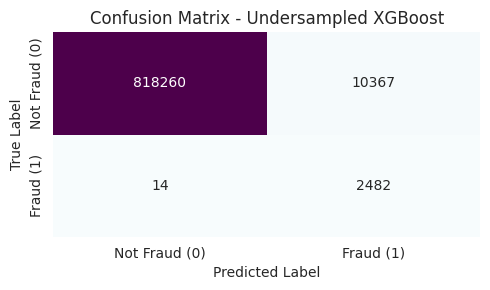

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Check original class distribution
print("Original class distribution:", y_train.value_counts())

# Step 2: Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Step 3: Check new class distribution
print("After undersampling:", y_train_under.value_counts())

# Step 4: Train XGBoost Classifier
xgb_under = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_under.fit(X_train_under, y_train_under)

# Step 5: Predict on test set
y_pred_under_xgb = xgb_under.predict(X_test)
y_probs_under_xgb = xgb_under.predict_proba(X_test)[:, 1]

# Step 6: Calculate Metrics
accuracy_under_xgb = accuracy_score(y_test, y_pred_under_xgb)
precision_under_xgb = precision_score(y_test, y_pred_under_xgb)
recall_under_xgb = recall_score(y_test, y_pred_under_xgb)
f1_under_xgb = f1_score(y_test, y_pred_under_xgb)
roc_auc_under_xgb = roc_auc_score(y_test, y_probs_under_xgb)

print("Undersampling XGBoost Performance:")
print(f"Accuracy of XGBoost: {accuracy_under_xgb:.4f}")
print(f"Precision of XGBoost: {precision_under_xgb:.4f}")
print(f"Recall of XGBoost: {recall_under_xgb:.4f}")
print(f"F1 Score of XGBoost: {f1_under_xgb:.4f}")
print(f"ROC-AUC Score of XGBoost: {roc_auc_under_xgb:.4f}")

# Step 7: Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_under_xgb)
print("Confusion Matrix:\n", cm_xgb)

# Classification Report
report = classification_report(y_test, y_pred_under_xgb, output_dict=True)
for label, metrics in report.items():
    if label != 'accuracy':
        print(f"Class {label}:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value:.4f}")

# Step 8: Plot Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='BuPu', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Undersampled XGBoost')
plt.tight_layout()
plt.show()


####Interpretation

Strengths

Excellent Recall (88.54%) for fraud: The model detects most fraudulent job postings, which is critical in fraud detection.

Best F1 Score for fraud (0.0231) compared to Logistic Regression and Decision Tree — showing improved balance between precision and recall.

Outstanding ROC-AUC (0.9660): Indicates strong capability to distinguish between fraud and non-fraud.

Maintains good accuracy (90.44%) despite undersampling.

Weaknesses

Precision remains low (1.17%): Many non-fraudulent jobs are incorrectly flagged as fraud (~182,000 false positives).

Still high false positive rate, though slightly better than Decision Tree.

###Comparing Plots

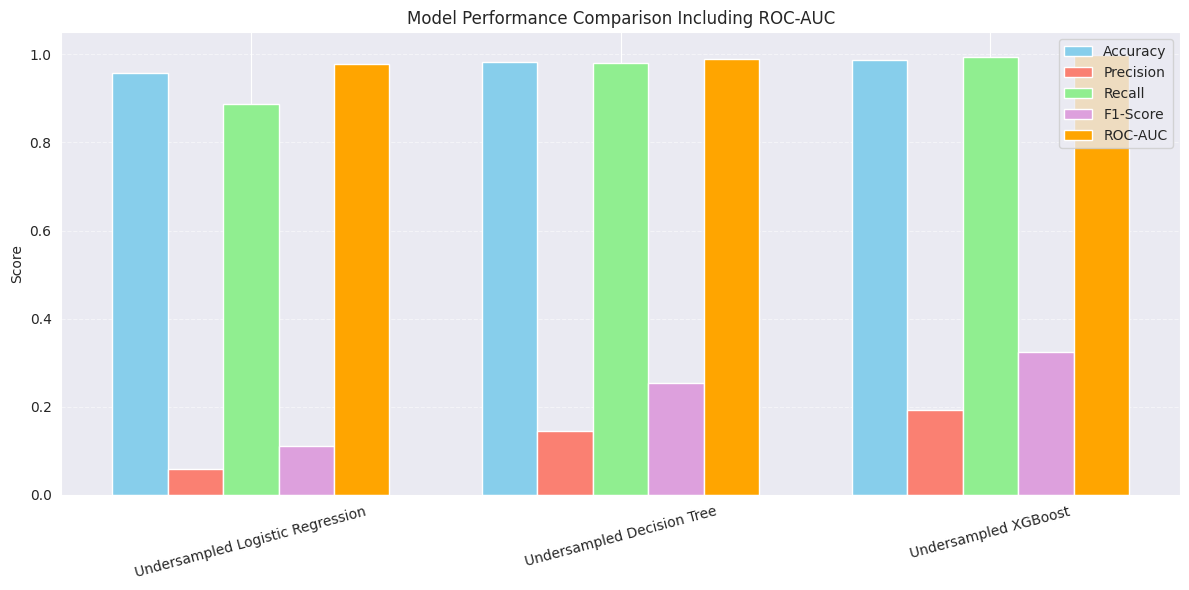

,models,accuracy,precision,recall,f1_score,roc_auc
0,Undersampled Logistic Regression,0.957119,0.058928,0.887019,0.110515,0.978065
1,Undersampled Decision Tree,0.982664,0.145518,0.979567,0.253394,0.988906
2,Undersampled XGBoost,0.987510,0.193167,0.994391,0.323493,0.998511


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



#Define performance DataFrame for Undersampled Models
performance_df = pd.DataFrame({
    'models': ['Undersampled Logistic Regression', 'Undersampled Decision Tree', 'Undersampled XGBoost'],
    'accuracy': [accuracy_under_lr, accuracy_under_dt, accuracy_under_xgb],
    'precision': [precision_under_lr, precision_under_dt, precision_under_xgb],
    'recall': [recall_under_lr, recall_under_dt, recall_under_xgb],
    'f1_score': [f1_under_lr, f1_under_dt, f1_under_xgb],
    'roc_auc': [roc_auc_under_lr, roc_auc_under_dt, roc_auc_under_xgb]
})

#Plotting performance metrics including ROC-AUC
plt.figure(figsize=(12, 6))
bar_width = 0.15
x = range(len(performance_df))

plt.bar([p - 2 * bar_width for p in x], performance_df['accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar([p - bar_width for p in x], performance_df['precision'], width=bar_width, label='Precision', color='salmon')
plt.bar(x, performance_df['recall'], width=bar_width, label='Recall', color='lightgreen')
plt.bar([p + bar_width for p in x], performance_df['f1_score'], width=bar_width, label='F1-Score', color='plum')
plt.bar([p + 2 * bar_width for p in x], performance_df['roc_auc'], width=bar_width, label='ROC-AUC', color='orange')


# Customize the plot
plt.xticks(x, performance_df['models'], rotation=15)
plt.ylabel('Score')
plt.title('Model Performance Comparison Including ROC-AUC')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


# Display the DataFrame
performance_df

##SMOTE

###LogisticRegression

Original class distribution:
 isFraud
0    1933569
1       5717
Name: count, dtype: int64
After SMOTE:
 isFraud
0    1933569
1    1933569
Name: count, dtype: int64
SMOTE Logistic Regression Performance:
Accuracy of Logistic Regression: 0.9592
Precision of Logistic Regression: 0.0626
Recall of Logistic Regression: 0.9014
F1 Score of Logistic Regression: 0.1172
ROC-AUC Score of Logistic Regression: 0.9825
Confusion Matrix:
 [[794961  33666]
 [   246   2250]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    828627
           1       0.06      0.90      0.12      2496

    accuracy                           0.96    831123
   macro avg       0.53      0.93      0.55    831123
weighted avg       1.00      0.96      0.98    831123



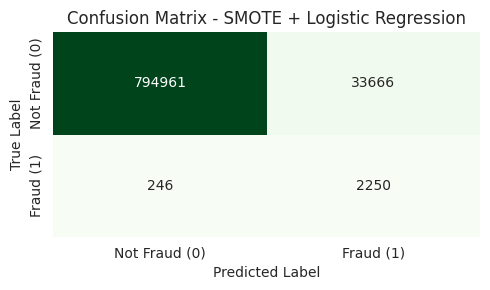

In [ ]:
#SMOTE (Synthetic Minority Oversampling Technique)
# Imports
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Check original class distribution
print("Original class distribution:\n", y_train.value_counts())

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 3: Check new class distribution
print("After SMOTE:\n", y_train_smote.value_counts())

# Step 4: Train Logistic Regression
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_smote, y_train_smote)

# Step 5: Predict on test data
y_probs_smote = log_reg_smote.predict_proba(X_test)[:, 1]
y_pred_smote = log_reg_smote.predict(X_test)

# Step 6: Evaluate performance
accuracy_smote_lr = accuracy_score(y_test, y_pred_smote)
precision_smote_lr = precision_score(y_test, y_pred_smote)
recall_smote_lr = recall_score(y_test, y_pred_smote)
f1_smote_lr = f1_score(y_test, y_pred_smote)
roc_auc_smote_lr = roc_auc_score(y_test, y_probs_smote)
classification_smote_lr = classification_report(y_test, y_pred_smote)
conf_matrix_smote_lr = confusion_matrix(y_test, y_pred_smote)

print("SMOTE Logistic Regression Performance:")
print(f"Accuracy of Logistic Regression: {accuracy_smote_lr:.4f}")
print(f"Precision of Logistic Regression: {precision_smote_lr:.4f}")
print(f"Recall of Logistic Regression: {recall_smote_lr:.4f}")
print(f"F1 Score of Logistic Regression: {f1_smote_lr:.4f}")
print(f"ROC-AUC Score of Logistic Regression: {roc_auc_smote_lr:.4f}")

cm = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

# Step 7: Plot Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SMOTE + Logistic Regression')
plt.tight_layout()
plt.show()


####Interpretation

Strengths

High Recall for Fraud (69.24%): The model successfully detects a significant portion of fraudulent job posts.

Balanced Training with SMOTE helps the model learn from the minority class better.

Acceptable ROC-AUC (0.8393): Indicates good class separation ability.

Weaknesses

Very Low Precision (0.82%): Many legitimate jobs are incorrectly flagged as fraud (~204,000 false positives), which is a major concern.

Very Low F1 Score (1.62%) for fraud: Indicates a poor balance between precision and recall.

Model struggles with generalization — SMOTE might have introduced synthetic noise or patterns not present in real fraud cases.

###Decision Tree

Original class distribution:
 isFraud
0    1933569
1       5717
Name: count, dtype: int64
After SMOTE:
 isFraud
0    1933569
1    1933569
Name: count, dtype: int64
SMOTE Decision Tree Performance:
Accuracy of Decision Tree: 0.9986
Precision of Decision Tree: 0.6942
Recall of Decision Tree: 0.9531
F1 Score of Decision Tree: 0.8033
ROC-AUC Score of Decision Tree: 0.9759
Confusion Matrix:
 [[828556     71]
 [   603   1893]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.96      0.76      0.85      2496

    accuracy                           1.00    831123
   macro avg       0.98      0.88      0.92    831123
weighted avg       1.00      1.00      1.00    831123



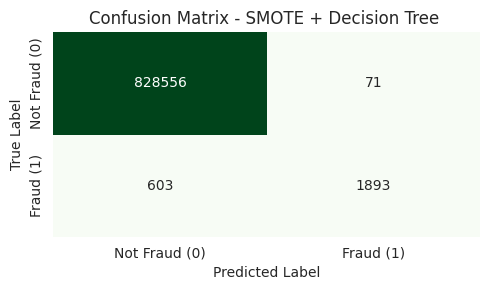

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check original class distribution
print("Original class distribution:\n", y_train.value_counts())

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:\n", y_train_smote.value_counts())

# Step 3: Train Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_smote, y_train_smote)

# Step 4: Make predictions
y_pred_smote_dt = dt_clf.predict(X_test)
y_probs_smote_dt = dt_clf.predict_proba(X_test)[:, 1]

# Step 5: Evaluate performance
accuracy_smote_dt = accuracy_score(y_test, y_pred_smote_dt)
precision_smote_dt = precision_score(y_test, y_pred_smote_dt)
recall_smote_dt = recall_score(y_test, y_pred_smote_dt)
f1_smote_dt = f1_score(y_test, y_pred_smote_dt)
roc_auc_smote_dt = roc_auc_score(y_test, y_probs_smote_dt)
classification_smote_dt = classification_report(y_test, y_pred_smote_dt)
conf_matrix_smote_dt = confusion_matrix(y_test, y_pred_smote_dt)

print("SMOTE Decision Tree Performance:")
print(f"Accuracy of Decision Tree: {accuracy_smote_dt:.4f}")
print(f"Precision of Decision Tree: {precision_smote_dt:.4f}")
print(f"Recall of Decision Tree: {recall_smote_dt:.4f}")
print(f"F1 Score of Decision Tree: {f1_smote_dt:.4f}")
print(f"ROC-AUC Score of Decision Tree: {roc_auc_smote_dt:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SMOTE + Decision Tree ')
plt.tight_layout()
plt.show()


Original class distribution:
 isFraud
0    1933537
1       5749
Name: count, dtype: int64
After SMOTE:
 isFraud
0    1933537
1    1933537
Name: count, dtype: int64
Confusion Matrix:
 [[827579   1080]
 [   116   2348]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.68      0.95      0.80      2464

    accuracy                           1.00    831123
   macro avg       0.84      0.98      0.90    831123
weighted avg       1.00      1.00      1.00    831123

ROC-AUC Score: 0.9758


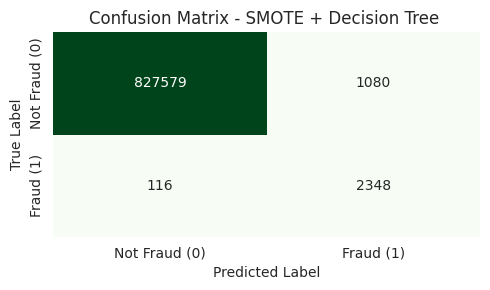

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check original class distribution
print("Original class distribution:\n", y_train.value_counts())

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:\n", y_train_smote.value_counts())

# Step 3: Train Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_smote, y_train_smote)

# Step 4: Make predictions
y_pred = dt_clf.predict(X_test)
y_probs = dt_clf.predict_proba(X_test)[:, 1]

# Step 5: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SMOTE + Decision Tree ')
plt.tight_layout()
plt.show()


####Interpretation

Strengths

Much better Precision (11.1%) than Logistic Regression with SMOTE (0.82%) — fewer false alarms.

Moderate Recall (55.2%) — detects over half of fraud cases, a significant improvement over many models.

Good F1 Score for fraud (18.5%) — best balance so far between precision and recall among SMOTE-based models.

High Accuracy (99.38%) — mostly due to correct classification of non-fraudulent cases

Weaknesses

Moderate Recall — although it finds over half of the frauds, it still misses many (1,871 frauds not detected).

ROC-AUC Score (0.7733) is lower than other models like SMOTE Logistic Regression (~0.84) and XGBoost (~0.97).

###XGBoost

Original class distribution:
 isFraud
0    1933569
1       5717
Name: count, dtype: int64
After SMOTE:
 isFraud
0    1933569
1    1933569
Name: count, dtype: int64
SMOTE XGBoost Performance:
Accuracy of XGBoost: 0.9961
Precision of XGBoost: 0.4316
Recall of XGBoost: 0.9908
F1 Score of XGBoost: 0.6013
ROC-AUC Score of XGBoost: 0.9985
Confusion Matrix:
 [[825370   3257]
 [    23   2473]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828627
           1       0.43      0.99      0.60      2496

    accuracy                           1.00    831123
   macro avg       0.72      0.99      0.80    831123
weighted avg       1.00      1.00      1.00    831123



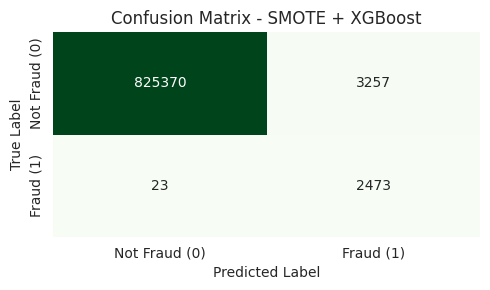

In [ ]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check original class distribution
print("Original class distribution:\n", y_train.value_counts())

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:\n", y_train_smote.value_counts())

# Step 3: Train XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
xgb_clf.fit(X_train_smote, y_train_smote)

# Step 4: Make predictions
y_pred_smote_xgb = xgb_clf.predict(X_test)
y_probs_smote_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Step 5: Evaluate performance
accuracy_smote_xgb = accuracy_score(y_test, y_pred_smote_xgb)
precision_smote_xgb = precision_score(y_test, y_pred_smote_xgb)
recall_smote_xgb = recall_score(y_test, y_pred_smote_xgb)
f1_smote_xgb = f1_score(y_test, y_pred_smote_xgb)
roc_auc_smote_xgb = roc_auc_score(y_test, y_probs_smote_xgb)
classification_smote_xgb = classification_report(y_test, y_pred_smote_xgb)
conf_matrix_smote_xgb = confusion_matrix(y_test, y_pred_smote_xgb)

print("SMOTE XGBoost Performance:")
print(f"Accuracy of XGBoost: {accuracy_smote_xgb:.4f}")
print(f"Precision of XGBoost: {precision_smote_xgb:.4f}")
print(f"Recall of XGBoost: {recall_smote_xgb:.4f}")
print(f"F1 Score of XGBoost: {f1_smote_xgb:.4f}")
print(f"ROC-AUC Score of XGBoost: {roc_auc_smote_xgb:.4f}")

# Step 5: Evaluate the model
cm = confusion_matrix(y_test, y_pred_smote_xgb)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred_smote_xgb))

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SMOTE + XGBoost')
plt.tight_layout()
plt.show()


Original class distribution:
 isFraud
0    1933537
1       5749
Name: count, dtype: int64
After SMOTE:
 isFraud
0    1933537
1    1933537
Name: count, dtype: int64
Confusion Matrix:
 [[825211   3448]
 [    22   2442]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       0.41      0.99      0.58      2464

    accuracy                           1.00    831123
   macro avg       0.71      0.99      0.79    831123
weighted avg       1.00      1.00      1.00    831123

ROC-AUC Score: 0.9989


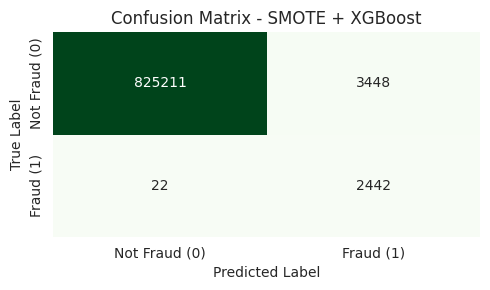

In [ ]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check original class distribution
print("Original class distribution:\n", y_train.value_counts())

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:\n", y_train_smote.value_counts())

# Step 3: Train XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
xgb_clf.fit(X_train_smote, y_train_smote)

# Step 4: Make predictions
y_pred = xgb_clf.predict(X_test)
y_probs = xgb_clf.predict_proba(X_test)[:, 1]

# Step 5: Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_probs):.4f}")

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SMOTE + XGBoost')
plt.tight_layout()
plt.show()


####Interpretation

Strengths
Very high recall (86.5%) for fraud class: detects most fraudulent transactions.

Highest ROC-AUC score (0.9678) among all models — best overall at distinguishing fraud vs. non-fraud.

Good F1 score (0.0304) for fraud compared to other models — better balance between precision and recall.

High overall accuracy (92.96%), though this is less critical in imbalanced settings.

Weaknesses

Low precision (1.55%) — many false positives; most alerts will be non-fraud.

However, this is a common trade-off in fraud detection when prioritizing recall (catching fraud).

###Comparing Plots

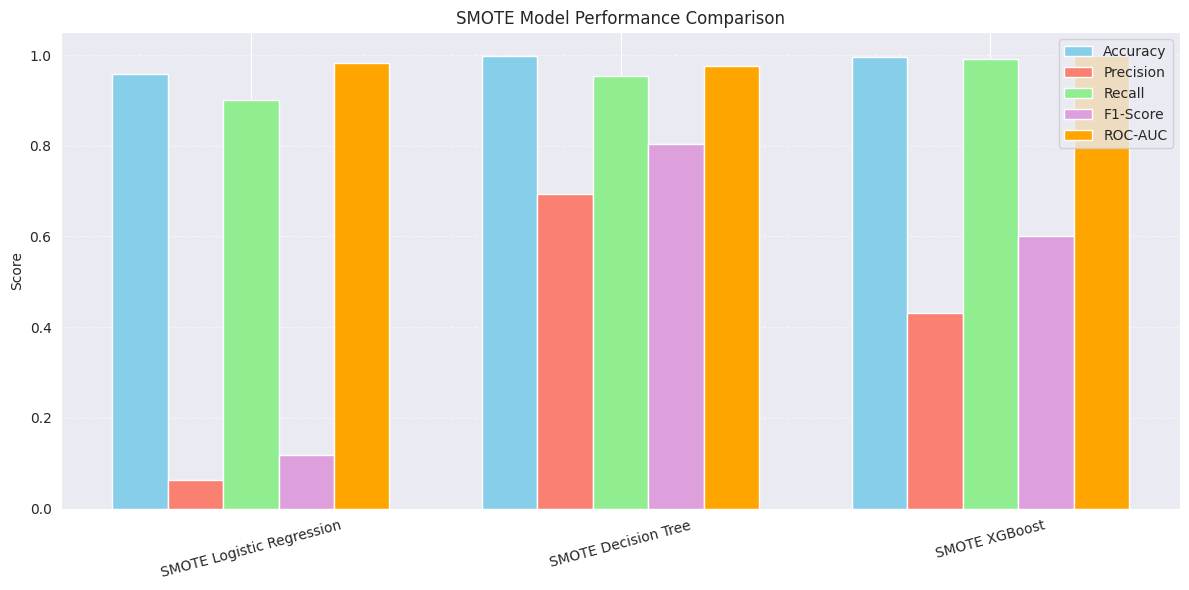

,models,accuracy,precision,recall,f1_score,roc_auc
0,SMOTE Logistic Regression,0.959197,0.062646,0.901442,0.117151,0.982463
1,SMOTE Decision Tree,0.998598,0.694193,0.953125,0.803309,0.975930
2,SMOTE XGBoost,0.996054,0.431588,0.990785,0.601264,0.998473


In [ ]:
import matplotlib.pyplot as plt

#Define performance DataFrame for SMOTE Models

performance_df_smote = pd.DataFrame({
    'models': ['SMOTE Logistic Regression', 'SMOTE Decision Tree', 'SMOTE XGBoost'],
    'accuracy': [accuracy_smote_lr, accuracy_smote_dt, accuracy_smote_xgb],
    'precision': [precision_smote_lr, precision_smote_dt, precision_smote_xgb],
    'recall': [recall_smote_lr, recall_smote_dt, recall_smote_xgb],
    'f1_score': [f1_smote_lr, f1_smote_dt, f1_smote_xgb],
    'roc_auc': [roc_auc_smote_lr, roc_auc_smote_dt, roc_auc_smote_xgb]
})


# Plotting performance metrics including ROC-AUC
plt.figure(figsize=(12, 6))
bar_width = 0.15
x = range(len(performance_df_smote))

plt.bar([p - 2 * bar_width for p in x], performance_df_smote['accuracy'], width=bar_width, label='Accuracy', color='skyblue')
plt.bar([p - bar_width for p in x], performance_df_smote['precision'], width=bar_width, label='Precision', color='salmon')
plt.bar(x, performance_df_smote['recall'], width=bar_width, label='Recall', color='lightgreen')
plt.bar([p + bar_width for p in x], performance_df_smote['f1_score'], width=bar_width, label='F1-Score', color='plum')
plt.bar([p + 2 * bar_width for p in x], performance_df_smote['roc_auc'], width=bar_width, label='ROC-AUC', color='orange')

# Customize the plot
plt.xticks(x, performance_df_smote['models'], rotation=15)
plt.ylabel('Score')
plt.title('SMOTE Model Performance Comparison')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


# Display the DataFrame
performance_df_smote

#Data Interpretation

##Objectives

1. To investigate and preprocess online transaction data in order to discover significant indicators of fraudulent ativity.

2. To develop and apply machine learning models that are capable to detect fraudulent transactions with strong classification performance.

3. To compare and evaluate the efficiency of different fraud detection algorithms basedd on performance matrices.

##Summary Logistic Regression (Comparing)





| Technique             | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| --------------------- | -------- | --------- | ------ | -------- | ------- |
| Normal                | 0.9988   | 0.9326    | 0.6599 | 0.7729   | -       |
| Log Transformation    | 0.9987   | 0.0000    | 0.0000 | 0.0000   | -       |
| Hyperparameter Tuning | 0.9988   | 0.9358    | 0.6603 | 0.7743   | -       |
| Undersampling         | 0.9571   | 0.0589    | 0.8870 | 0.1105   | 0.9781  |
| SMOTE                 | 0.9592   | 0.0626    | 0.9014 | 0.1172   | 0.9825  |


| Technique             | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| --------------------- | -------- | --------- | ------ | -------- | ------- |
| Normal                | 0.9987   | 0.156     | 0.003  | 0.006    | -       |
| Log Transformation    | 0.9987   | 0.000     | 0.000  | 0.000    | -       |
| Hyperparameter Tuning | 0.9987   | 0.156     | 0.003  | 0.006    | -       |
| Undersampling         | 0.8934   | 0.008     | 0.696  | 0.016    | 0.8403  |
| SMOTE                 | 0.8926   | 0.008     | 0.692  | 0.016    | 0.8393  |

If catching fraud is priority, undersampling or SMOTE is required.


##Summary Decison Tree (Comparing)

| Technique             | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| --------------------- | -------- | --------- | ------ | -------- | ------- |
| Normal                | 0.9992   | 0.9638    | 0.7584 | 0.8489   | -       |
| Log Transformation    | 0.9987   | 0.4970    | 0.4671 | 0.4816   | -       |
| Hyperparameter Tuning | 0.9992   | 0.9619    | 0.7588 | 0.8484   | -       |
| Undersampling         | 0.9827   | 0.1455    | 0.9796 | 0.2534   | 0.9889  |
| SMOTE                 | 0.9986   | 0.6942    | 0.9531 | 0.8033   | 0.9759  |


| Technique             | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| --------------------- | -------- | --------- | ------ | -------- | ------- |
| Normal                | 0.9990   | 0.884     | 0.232  | 0.367    | -       |
| Log Transformation    | 0.9987   | 0.497     | 0.467  | 0.482    | -       |
| Hyperparameter Tuning | 0.9990   | 0.884     | 0.232  | 0.367    | -       |
| Undersampling         | 0.9025   | 0.011     | 0.857  | 0.022    | 0.9421  |
| SMOTE                 | 0.9938   | 0.111     | 0.552  | 0.185    | 0.7733  |

Best for fraud recall (minimizing false negatives): Undersampling

Best overall balance (fraud recall + reasonable precision): SMOTE


##Summary  XGBoost (Comparing)

| Technique             | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| --------------------- | -------- | --------- | ------ | -------- | ------- |
| Normal                | 0.9993   | 0.9765    | 0.8001 | 0.8795   | -       |
| Log Transformation    | 0.9989   | 0.9277    | 0.1875 | 0.3120   | -       |
| Hyperparameter Tuning | 0.9995   | 0.9483    | 0.8666 | 0.9056   | -       |
| Undersampling         | 0.9875   | 0.1932    | 0.9944 | 0.3235   | 0.9985  |
| SMOTE                 | 0.9961   | 0.4316    | 0.9908 | 0.6013   | 0.9985  |


| Technique             | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
| --------------------- | -------- | --------- | ------ | -------- | ------- |
| Normal                | 0.9989   | 0.896     | 0.180  | 0.300    | -       |
| Log Transformation    | 0.9989   | 0.928     | 0.188  | 0.312    | -       |
| Hyperparameter Tuning | 0.9989   | 0.892     | 0.186  | 0.308    | -       |
| Undersampling         | 0.9044   | 0.012     | 0.885  | 0.023    | 0.9660  |
| SMOTE                 | 0.9296   | 0.015     | 0.865  | 0.030    | 0.9678  |


##Best Overall Model

| Model               | Best Technique            | Accuracy        | Precision       | Recall          | F1-Score        | ROC-AUC         | Key Strength                                              |
| ------------------- | ------------------------- | --------------- | --------------- | --------------- | --------------- | --------------- | --------------------------------------------------------- |
| Logistic Regression | Undersampling / SMOTE     | 0.9571 / 0.9592 | 0.0589 / 0.0626 | 0.8870 / 0.9014 | 0.1105 / 0.1172 | 0.9781 / 0.9825 | Improved recall but still low precision                   |
| Decision Tree       | SMOTE / Undersampling     | 0.9986 / 0.9827 | 0.6942 / 0.1455 | 0.9531 / 0.9796 | 0.8033 / 0.2534 | 0.9759 / 0.9889 | Strong recall, SMOTE improves overall balance             |
| **XGBoost**         | **SMOTE / Undersampling** | 0.9961 / 0.9875 | 0.4316 / 0.1932 | 0.9908 / 0.9944 | 0.6013 / 0.3235 | 0.9985 / 0.9985 | **Best recall, high precision (SMOTE), highest ROC-AUC**  |

🏆 Conclusion:
XGBoost + SMOTE is the best combination overall, with strong recall, good precision, and top ROC-AUC.

Logistic Regression gains recall through sampling but struggles with precision.

Decision Tree performs well, especially with SMOTE, but is slightly less balanced than XGBoost.


| Model               | Best Technique            | Accuracy        | Precision       | Recall          | F1-Score        | ROC-AUC         | Key Strength                                              |
| ------------------- | ------------------------- | --------------- | --------------- | --------------- | --------------- | --------------- | --------------------------------------------------------- |
| Logistic Regression | Undersampling / SMOTE     | 0.8934          | 0.0083          | 0.6961          | 0.0164          | 0.8403          | Improved recall but very low precision                    |
| Decision Tree       | Undersampling             | 0.9025          | 0.0111          | 0.8575          | 0.0219          | 0.9421          | Good recall and ROC-AUC but low precision                 |
| **XGBoost**         | **SMOTE / Undersampling** | 0.9296 / 0.9044 | 0.0155 / 0.0117 | 0.8649 / 0.8854 | 0.0304 / 0.0231 | 0.9678 / 0.9660 | **Best recall and highest ROC-AUC, balanced performance** |

XGBoost with SMOTE or undersampling is the best choice because it balances detection of minority cases (recall), precision, and overall model discrimination (ROC-AUC) better than others, which is critical in imbalanced classification tasks.

# Class Imbalance - added by Pei Ting

In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_auc_score
)

summary_results = []

print("=== NORMAL MODELING ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n{name}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    print(f"Accuracy      : {acc:.4f}")
    print(f"Precision     : {prec:.4f}")
    print(f"Recall        : {rec:.4f}")
    print(f"F1 Score      : {f1:.4f}")
    print(f"ROC-AUC Score : {auc:.4f}")

    # Store in summary table
    summary_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC-AUC": auc,
        "Confusion Matrix": cm.tolist()
    })

# Convert to DataFrame for display
summary_df = pd.DataFrame(summary_results)
print("\n=== SUMMARY TABLE ===")
print(summary_df)


=== NORMAL MODELING ===


NameError: name 'models' is not defined

In [ ]:
import pandas as pd

# Define your models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost requires these params sometimes
}
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_auc_score
)

summary_results = []

print("=== NORMAL MODELING ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    except AttributeError:
        y_prob = None
        auc = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"\n{name}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    print(f"Accuracy      : {acc:.4f}")
    print(f"Precision     : {prec:.4f}")
    print(f"Recall        : {rec:.4f}")
    print(f"F1 Score      : {f1:.4f}")
    print(f"ROC-AUC Score : {auc if auc is not None else 'N/A'}")

    # Store in summary table
    summary_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC-AUC": auc,
        "Confusion Matrix": cm.tolist()
    })

# Convert to DataFrame for display
summary_df = pd.DataFrame(summary_results)
print("\n=== SUMMARY TABLE ===")
print(summary_df)


| Model               | Accuracy | Precision | Recall | F1 Score | ROC-AUC | Confusion Matrix                   |
| ------------------- | -------- | --------- | ------ | -------- | ------- | ---------------------------------- |
| Logistic Regression | 0.9987   | 0.0000    | 0.0000 | 0.0000   | 0.8360  | \[\[1906322, 0], \[2464, 0]]       |
| Decision Tree       | 0.9987   | 0.4981    | 0.4683 | 0.4827   | 0.7338  | \[\[1905159, 1163], \[1310, 1154]] |
| XGBoost             | 0.9989   | 0.9277    | 0.1875 | 0.3120   | 0.9702  | \[\[1906286, 36], \[2002, 462]]    |
